# **End to End Machine Learning Intro with SkLearn**

In [1]:
# Listify the contents of what I am going to cover
what_to_cover = ['1. An end to end Scikit-Learn workflow',
'2. Getting data ready(to be used with machine learning models)',
'3. Choosing a machine learning model',
'4. Fiting a model to the dat(learning patterns)',
'5. Making predictions with a model (using patterns)',
'6. Evaluating model predictions',
'7. Improving model predictions',
'8. Saving and loading models']

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
print(sk.__version__)

1.3.0


In [4]:
url = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/heart-disease.csv'
heart_disease = pd.read_csv(url)
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Creating the featues
X = heart_disease.drop('target', axis=1)

# Creating the labels
y = heart_disease['target']

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
clf = RandomForestClassifier()

# Keep the defaults
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# Fit th model to the data
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Fit the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Make predictions
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [12]:
# Evaluate the model
clf.score(X_train, y_train)

1.0

It's quite compelling that a model performs at 100% accuracy. This is not so, see the model has been evaluated onteh the same dataset that it has been trained on thus producing an accuracy of 100%.
The model should be evaluated on unseed data(test_data`)

In [13]:
# Evaluate the model on unseen data(test_data)
clf.score(X_test, y_test)

0.8688524590163934

In [14]:
# More metrics to evaluate other than accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 4, 28]])

In [16]:
accuracy_score(y_test, y_preds)

0.8688524590163934

## Try improving the model

In [17]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)* 100:.2f}%")
    print('')

Trying model with 10 estimators
Model accuracy on test set: 80.33%

Trying model with 20 estimators
Model accuracy on test set: 88.52%

Trying model with 30 estimators
Model accuracy on test set: 86.89%

Trying model with 40 estimators
Model accuracy on test set: 83.61%

Trying model with 50 estimators
Model accuracy on test set: 86.89%

Trying model with 60 estimators
Model accuracy on test set: 83.61%

Trying model with 70 estimators
Model accuracy on test set: 86.89%

Trying model with 80 estimators
Model accuracy on test set: 86.89%

Trying model with 90 estimators
Model accuracy on test set: 86.89%



## 6. Two ways to save and load the model

In [19]:
# 1. Save the model with pickle
import pickle

pickle.dump(clf, open("random_forest_model_1", 'wb')) # wb = write binary

In [20]:
# Load the model
pickle_model = pickle.load(open('random_forest_model_1', 'rb')) # rb = read binary

In [21]:
# use the loaded model to make prediction
pickle_model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [22]:
# Save the model with joblib
import joblib
my_model = 'model.joblib'

joblib.dump(clf, my_model)

['model.joblib']

In [23]:
# Load the model
joblib_load=joblib.load(my_model)

In [24]:
# Make predictions
joblib_load.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

# Getting the data ready to be used with machine learing
Three main steps
1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [25]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [30]:
## Make sure its all numerical
url  = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/car-sales-extended.csv'

car_sales = pd.read_csv(url)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price'] 

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
car_sales.dtypes

### Make sure its all numerical

**Method one:Using one hot encoding**

In [ ]:
# Covert the data into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
car_sales.Colour.value_counts()

**Method 2: Using pd.get_dummies**

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [33]:
# Refit the model after converting into numerical
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)


NameError: name 'transformed_X' is not defined

In [34]:
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

# Data with missing values
What to do?
1. Fill them with some values(also known as imputation)
2. Remove the samples with missing data altogeter


In [35]:
url = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/car-sales-missing-data.csv'
car_sales_missing = pd.read_csv(url)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


**Method one: Remove missing data**

In [36]:
# use drop
car_sales_missing.isnull().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [37]:
car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [38]:
car_sales_missing.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [39]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '').astype(int)
car_sales_missing

/tmp/ipykernel_2589/772944741.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '').astype(int)


,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500


In [40]:
# Create X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [41]:
# Convert the data into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 8.78990e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.13095e+05]])

In [42]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500


In [43]:
url = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/car-sales-missing-data.csv'
car_sales_impute = pd.read_csv(url)
car_sales_impute

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


**Method 2: Using simple imputer**

Use car sales missing data with over 1000 rows

In [44]:
# Fill missing data with pandas
url = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/car-sales-extended-missing-data.csv'
car_sales_missing = pd.read_csv(url)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the "Colour" column
car_sales_missing['Colour'].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing)

950

In [50]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [51]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [52]:
# Convert the data into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2: Fill missing values with Scikit learn

In [53]:
car_missing_impute = pd.read_csv(url)
car_missing_impute

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
# Drop rows with missing prices
car_missing_impute.dropna(subset=['Price'], inplace=True)
len(car_missing_impute)

950

In [55]:
# Split into features and lables
X = car_missing_impute.drop("Price", axis=1)
y = car_missing_impute['Price']

In [56]:
# Use simple imputer to fill the rest
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical with 'missing' and numerical with 'mean'
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', "Colour"]
door_features = ['Doors']
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer= ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
car_sales_filled = pd.DataFrame(filled_X, 
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [58]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
car_sales_filled.dtypes

Make             object
Colour           object
Doors            object
Odometer (KM)    object
dtype: object

In [60]:
# Convert the data into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [61]:
# Fit a model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

# Choosing the Right Model
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [62]:
# Import the California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [63]:
housing_df= pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [64]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [65]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## From the sklearn map

**Ridge**

In [67]:
# Import algorithm
from sklearn.linear_model import Ridge

# Set the random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = Ridge()

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
model.score(X_test, y_test)



0.5758549611440126

**Random forest Regressor**

In [68]:
# Import from sklearn
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8051230593157366

# Picking a Machine learning model for a classification problem

In [69]:
# Use the heart_disease dataset
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = LinearSVC()

#Fit the modle
clf.fit(X_train, y_train)

# Evaluate the model
clf.score(X_test, y_test)

/home/joe/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/joe/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [71]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [72]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = RandomForestClassifier()

#Fit the model
clf.fit(X_train, y_train)

# Evaluate the model
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
what_to_cover

['1. An end to end Scikit-Learn workflow',
 '2. Getting data ready(to be used with machine learning models)',
 '3. Choosing a machine learning model',
 '4. Fiting a model to the dat(learning patterns)',
 '5. Making predictions with a model (using patterns)',
 '6. Evaluating model predictions',
 '7. Improving model predictions',
 '8. Saving and loading models']

# Make predictions using a machine learning model
2 ways to make predictions:

    1. Predict()
    2. Predict_proba()

In [74]:
X_test.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [75]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [76]:
clf.predict_proba(X_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [77]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [78]:
clf.score(X_test, y_test)

0.8524590163934426

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [80]:
# Predict() can also be used for regresssion problems
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data 
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into training and test stes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model instance
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [81]:
import numpy as np
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [82]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [83]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 3 Ways to evaluate sklearn estimators

In [84]:
# using the score method
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X and y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = RandomForestRegressor()

# Fit the classifier on training data
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

0.8066196804802649

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
# Precdit
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
# Evaluating using cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [88]:
scores

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [89]:
cross_val_score(clf, X, y)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [90]:
np.random.seed(42)

# single training and test split score
clf_single_score  = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_score_val_score = np.mean(cross_val_score(clf, X, y,  cv=5))

# Compare the two
clf_single_score, clf_score_val_score                            

(0.8524590163934426, 0.8248087431693989)

In [91]:
# Scoring parameter set to  None by default
cross_val_score(clf,X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Evaluating Cross-validation
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classfication Report

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [93]:
np.mean(cross_val_score)

0.8248087431693989

In [94]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


**Area under the receive operating curve (AUC/ROC)**

In [95]:
# Create X_test .. etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probalities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [97]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [98]:
# Calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [99]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [100]:
len(y_preds)

61

In [101]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_preds)

In [102]:
confusion

array([[23,  6],
       [ 6, 26]])

In [103]:
len(y_test)

61

In [104]:
# Create a function for plotting roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a roc_curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='RoC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle="--", label='Guessing')
    
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

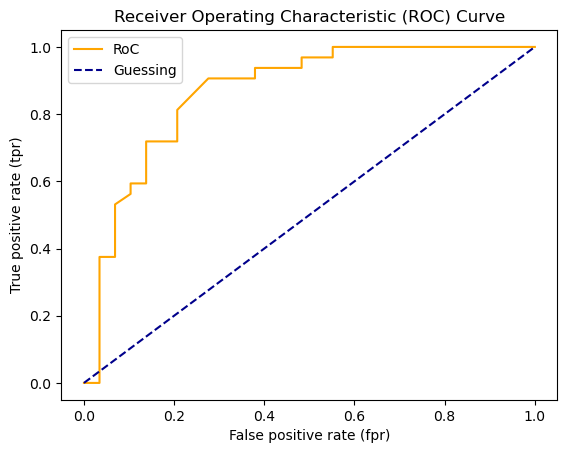

In [105]:
plot_roc_curve(fpr, tpr)

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

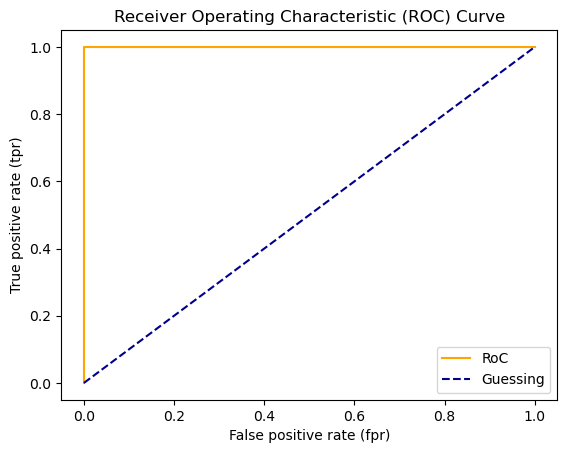

In [107]:
# Plot the perfect ROC and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

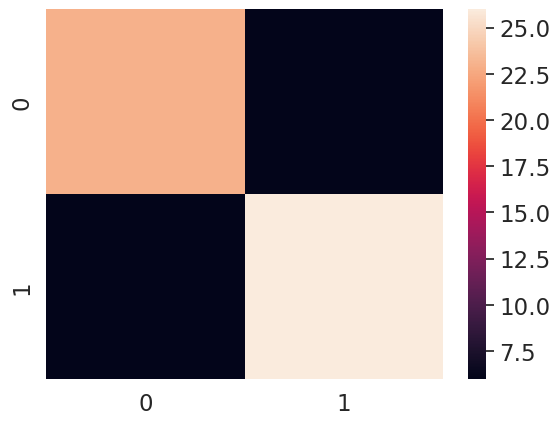

In [108]:
# Use seaborn heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

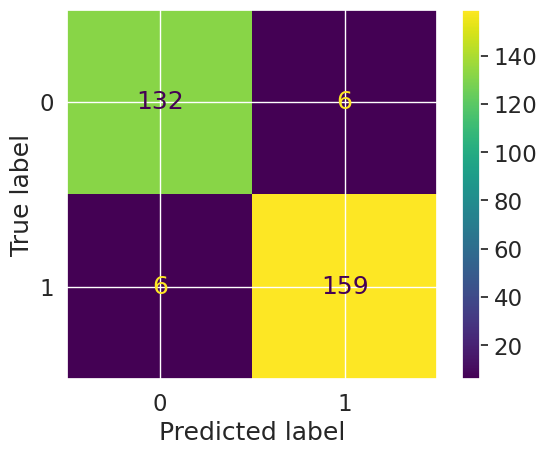

In [117]:
# Get more colors in the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

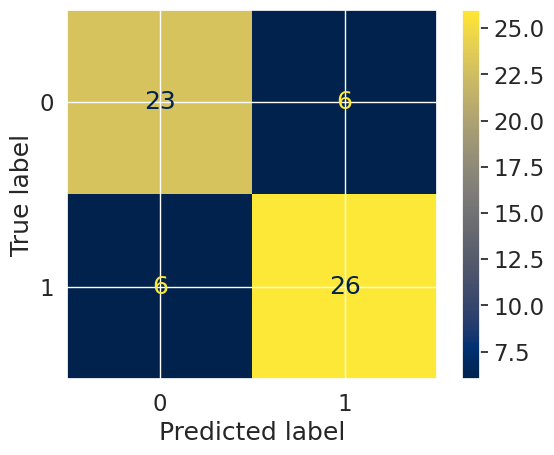

In [121]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds, cmap='cividis');

**Classification Report**

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Where prediction and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metric2s
1. R^ (r squared) or coefficient of determination
2. Mean Absolute error (MAE)
3. Mean Squared error (MSE)

In [130]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

In [131]:
y_preds = model.predict(X_test)

In [133]:
# Evaluation metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.8066196804802649

**Mean Absolute Error**

In [135]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [141]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})
df['differences'] = (df['actual values'] - df['predicted values'])
df['absolute'] = abs(df['actual values'] - df['predicted values'])
df

,actual values,predicted values,differences,absolute
20046,0.47700,0.493840,-0.016840,0.016840
3024,0.45800,0.754940,-0.296940,0.296940
15663,5.00001,4.928596,0.071414,0.071414
20484,2.18600,2.540290,-0.354290,0.354290
9814,2.78000,2.331760,0.448240,0.448240
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.412620
16623,2.66800,1.947760,0.720240,0.720240
18086,5.00001,4.836378,0.163632,0.163632
2144,0.72300,0.717820,0.005180,0.005180


**Mean Squared Error (mse)**

In [142]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds)

0.2534073069137548

### Using the scoring parameter 

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [146]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [147]:
# Cross validated accuracy
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is: 82.48%


In [149]:
# Use precision as scoring
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

In [150]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.84848485])

#### Scoring parameter for regression problems

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = RandomForestRegressor()

# Fit the model
clf.fit(X_train, y_train)

# Use scoring
cv_mae = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-0.55301325, -0.4108924 , -0.43733734, -0.4685569 , -0.47302286])

# Improving  a model
first predictiosn == baseline predictions
First Model == baseline model
**By hand**
1. train_set
2. test_set
3. validation_set

Try and adjust:

`max_depth`
  
`max_features`
     
`min_samples_leaf`
    
`min_samples_leaf`
    
`n_estimators`

In [178]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [179]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

## Hyper-parameter tuning with RandomizedSearchCV

In [162]:
from sklearn.utils import shuffle
heart_disease_shuffled = shuffle(heart_disease)
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0


In [163]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [100,200,500,1000,2000],
       "max_depth": [None, 5,10,20,30],
       "max_features": ['auto', 'sqrt'],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split inot train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate the model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSeachCV
rs_clf = RandomizedSearchCV(clf,
                            param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

# Fit the randomizedsearchCV of Clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000]},
                   verbose=2)

In [164]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [180]:
# Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 80.33%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


### Hyperparameter Tuning with GridSearchCV

In [183]:
grid_2 = {'n_estimators': [100, 200, 500, 1000, 2000],
         'min_samples_split': [6,2,4],
         'min_samples_leaf': [1,2,4,7],
         'max_features': ['sqrt', 'auto'],
         'max_depth': [None,10,20]}

In [187]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)


clf = RandomForestClassifier()

grid_clf = GridSearchCV(clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 4, 7],
                         'min_samples_split': [6, 2, 4],
                         'n_estimators': [100, 200, 500, 1000, 2000]},
             verbose=2)

In [188]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 500}

## Sklearn Pipeline

In [213]:
url = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/car-sales-extended-missing-data.csv'

### Steps for the pipeline
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [220]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv(url)
data.dropna(subset=['Price'], inplace=True)


# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# Fill missing values then convert to numbers
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_features)
])

# Creating a preprocessing  and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())
                         ])

# Split the data 
X = data.drop("Price", axis=1)
y = data['Price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875